In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt


In [2]:
img= cv2.imread('sharapova1.jpg')
img.shape

(555, 700, 3)

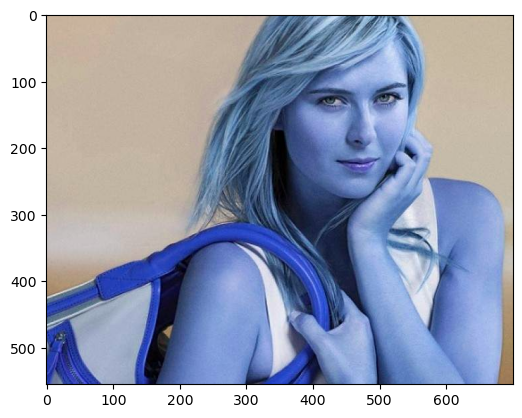

In [3]:
plt.imshow(img)

In [4]:
gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(555, 700)

In [5]:
gray

array([[175, 175, 175, ..., 176, 175, 174],
       [175, 175, 175, ..., 177, 175, 174],
       [175, 175, 175, ..., 177, 176, 174],
       ...,
       [ 84,  87,  88, ..., 113, 113, 113],
       [ 88,  89,  90, ..., 113, 113, 113],
       [ 93,  91,  91, ..., 112, 112, 112]], dtype=uint8)

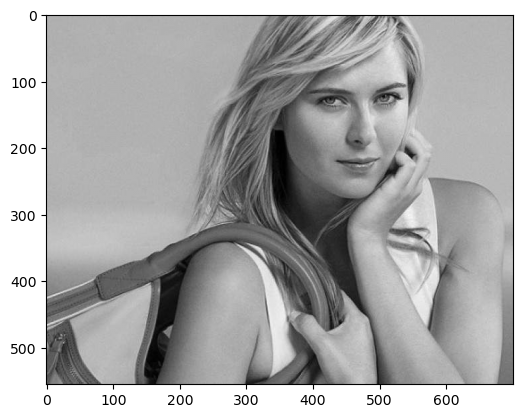

In [6]:
plt.imshow(gray, cmap='gray')

In [7]:
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
eye_cascade=cv2.CascadeClassifier('haarcascade_eye.xml')

faces= face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[352,  38, 233, 233]], dtype=int32)

In [8]:
(x,y,w,h) = faces[0]
x,y,w,h

(np.int32(352), np.int32(38), np.int32(233), np.int32(233))

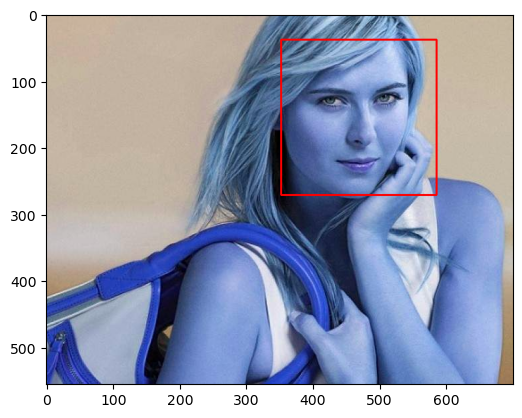

In [9]:
face_img= cv2.rectangle(img,(x,y), (x+w, y+h), (255, 0, 0), 2)
plt.imshow(face_img)

<function matplotlib.pyplot.show(close=None, block=None)>

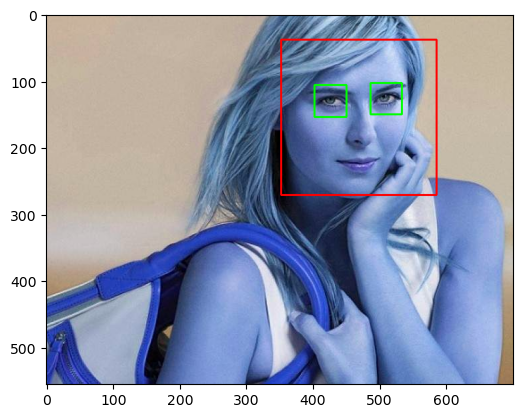

In [10]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img= cv2.rectangle(img, (x,y), (x+w, y+h), (255,0, 0), 2)
    roi_gray= gray[y:y+h, x:x+w]
    roi_color= face_img[y:y+h, x:x+w]
    eyes=eye_cascade.detectMultiScale(roi_gray)
    for (ex, ey, ew, eh) in eyes:
        cv2.rectangle(roi_color, (ex,ey), (ex+ew, ey+eh), (0, 255, 0), 2)

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show

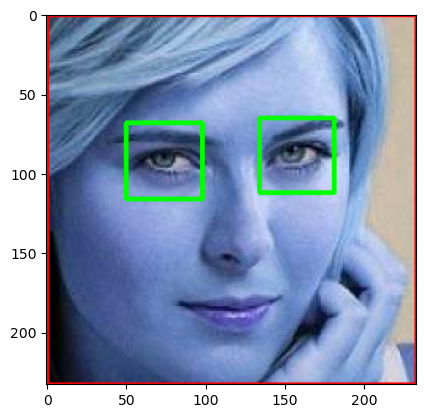

In [11]:
plt.imshow(roi_color, cmap= 'gray')

In [12]:
def get_cropped_image_if_2_eyes(image_path):
    img=cv2.imread(image_path)
    gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces=face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray=gray[y:y+h, x:x+w]
        roi_color=img[y:y+h, x:x+w]
        eyes=eye_cascade.detectMultiScale(roi_gray)
        if len(eyes)>=2:
            return roi_color

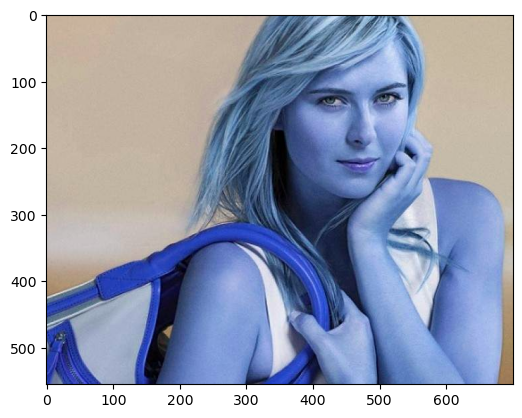

In [13]:
original_image=cv2.imread('sharapova1.jpg')
plt.imshow(original_image)

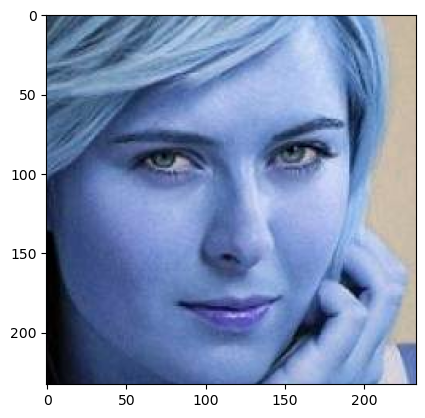

In [14]:
cropped_image= get_cropped_image_if_2_eyes('sharapova1.jpg')
plt.imshow(cropped_image)

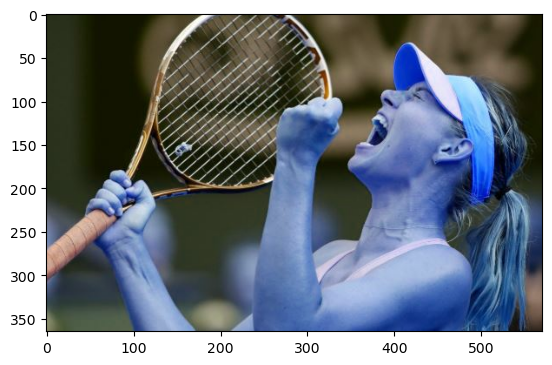

In [15]:
original_image_obstructed=cv2.imread('sharapova2.jpg')
plt.imshow(original_image_obstructed)

In [16]:
cropped_image_no2_eyes= get_cropped_image_if_2_eyes('sharapova2.jpg')
cropped_image_no2_eyes

In [17]:
path_to_data = './Dataset/'
path_to_cr_data='./Dataset/cropped'

In [18]:
import os
img_dirs=[]
for entry in os.scandir(path_to_data):
    if entry .is_dir():
        img_dirs.append(entry.path)
    

In [19]:
img_dirs

['./Dataset/cropped',
 './Dataset/croppedcroppedcroppedlionel_messi',
 './Dataset/croppedcroppedcroppedmaria_sharapova',
 './Dataset/croppedcroppedcroppedroger_federer',
 './Dataset/croppedcroppedcroppedserena_williams',
 './Dataset/croppedcroppedlionel_messi',
 './Dataset/croppedcroppedmaria_sharapova',
 './Dataset/croppedcroppedroger_federer',
 './Dataset/croppedcroppedserena_williams',
 './Dataset/croppedcroppedvirat_kohli',
 './Dataset/croppedlionel_messi',
 './Dataset/croppedmaria_sharapova',
 './Dataset/croppedroger_federer',
 './Dataset/croppedserena_williams',
 './Dataset/croppedvirat_kohli',
 './Dataset/lionel_messi',
 './Dataset/maria_sharapova',
 './Dataset/roger_federer',
 './Dataset/serena_williams',
 './Dataset/virat_kohli']

In [20]:
import shutil
if os.path.exists(path_to_cr_data):
    shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [21]:
{
    'lionel_messi': [
        './Dataset/cropped/messi/messi1.png'
        './Dataset/cropped/messi/messi2.png'
    ], 
    'viral_kohli':[
        './Dataset/cropped/kohli/kohli1.png'
        './Dataset/cropped/kohli/kohli2.png' 
    ]
}


{'lionel_messi': ['./Dataset/cropped/messi/messi1.png./Dataset/cropped/messi/messi2.png'],
 'viral_kohli': ['./Dataset/cropped/kohli/kohli1.png./Dataset/cropped/kohli/kohli2.png']}

In [22]:
cropped_image_dirs = []
celebrity_file_names_dict= {}

for img_dir in img_dirs:
    count = 1
    celebrity_name=img_dir.split('/')[-1]
    if celebrity_name.lower()!='cropped':
        print (celebrity_name)

    celebrity_file_names_dict[celebrity_name]=[]

    
    for entry in os.scandir(img_dir):
        roi_color= get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder= path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print('Generating cropped images in folder:', cropped_folder)

            cropped_file_name=celebrity_name+str(count)+".png"
            cropped_file_path= cropped_folder+'/'+ cropped_file_name

            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count+=1
            

croppedcroppedcroppedlionel_messi
croppedcroppedcroppedmaria_sharapova
croppedcroppedcroppedroger_federer
croppedcroppedcroppedserena_williams
croppedcroppedlionel_messi
croppedcroppedmaria_sharapova
croppedcroppedroger_federer
croppedcroppedserena_williams
croppedcroppedvirat_kohli
croppedlionel_messi
croppedmaria_sharapova
croppedroger_federer
croppedserena_williams
croppedvirat_kohli
lionel_messi
maria_sharapova
roger_federer
serena_williams
virat_kohli


In [23]:
import numpy as np
import pywt
import cv2

def w2d(img, mode='haar', level=1):
    imArray= img
    imArray=cv2.cvtColor( imArray, cv2.COLOR_RGB2GRAY)
    
    imArray=np.float32(imArray)
    imArray /=255;
    
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    coeffs_H=list(coeffs)
    coeffs_H[0] *=0;

    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *=255;
    imArray_H = np.uint8(imArray_H)

    return imArray_H
    

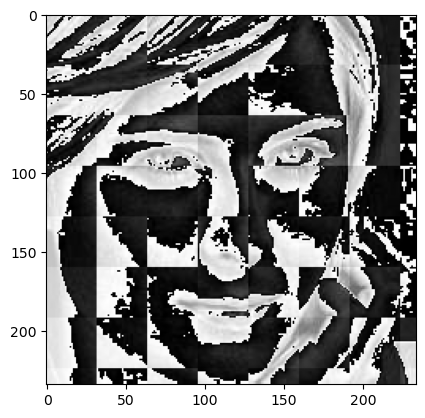

In [24]:
im_har=w2d(cropped_image, 'db1', 5)
plt.imshow(im_har,cmap= 'gray')

In [25]:
class_dict={}
count=0
for celebrity_name in celebrity_file_names_dict.keys():
    if celebrity_name != 'cropped':
        class_dict[celebrity_name]=count
        count=count+1
class_dict

{'croppedcroppedcroppedlionel_messi': 0,
 'croppedcroppedcroppedmaria_sharapova': 1,
 'croppedcroppedcroppedroger_federer': 2,
 'croppedcroppedcroppedserena_williams': 3,
 'croppedcroppedlionel_messi': 4,
 'croppedcroppedmaria_sharapova': 5,
 'croppedcroppedroger_federer': 6,
 'croppedcroppedserena_williams': 7,
 'croppedcroppedvirat_kohli': 8,
 'croppedlionel_messi': 9,
 'croppedmaria_sharapova': 10,
 'croppedroger_federer': 11,
 'croppedserena_williams': 12,
 'croppedvirat_kohli': 13,
 'lionel_messi': 14,
 'maria_sharapova': 15,
 'roger_federer': 16,
 'serena_williams': 17,
 'virat_kohli': 18}

In [26]:
X=[]
y=[]
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img=cv2.imread(training_image)
        if img is None:
            print(f"Failed to load image: {training_image}")
            continue 
        scalled_raw_img= cv2.resize(img, (32,32))
        img_har=w2d(img, 'db1', 5)
        scalled_img_har=cv2.resize(img_har, (32,32))
        combined_image= np.vstack((scalled_raw_img.reshape(32*32*3,1), scalled_img_har.reshape(32*32,1)))
        X.append(combined_image)
        y.append(class_dict[celebrity_name])


In [27]:
len(X)

280

In [28]:
len(X[0])

4096

In [29]:
X=np.array(X).reshape(len(X), 4096). astype(float)
X.shape

(280, 4096)

In [30]:
X[0]

array([ 17.,  29.,  39., ...,   4., 242., 253.])

In [31]:
len(y)

280

In [32]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [33]:
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2)
pipe= Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel='rbf', C=10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.5892857142857143

In [34]:
len(X_test)

56

In [35]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         0
           9       0.75      0.75      0.75         8
          10       0.50      0.33      0.40         6
          11       1.00      0.50      0.67         6
          12       0.75      0.43      0.55         7
          13       0.00      0.00      0.00         0
          14       0.86      0.67      0.75         9
          15       0.42      1.00      0.59         5
          16       0.60      0.75      0.67         4
          17       0.25      0.50      0.33         4
          18       1.00      0.60      0.75         5

    accuracy                           0.59        56
   macro avg       0.47      0.43      0.42        56
weighted avg       0.69      0.59      0.60        56



C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Admin\anaconda3\Lib\site-packages\sklea

In [36]:
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

In [ ]:
model_params= {
    
    'svm': {
        'model': svm.SVC(gamma='auto', probability=True),
        'params': {
        'svc__kernel': ['rbf', 'linear']
    }
    }, 
    'random_forest':{
        'model': RandomForestClassifier(),
        'params': {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression':{
        'model': LogisticRegression(solver= 'liblinear', multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    } 
}

In [ ]:
scores=[]
best_estimators={}
import pandas as pd
for algo, mp in model_params.items():
    pipe=make_pipeline(StandardScaler(), mp['model'])
    clf= GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model':algo,
        'best_score':clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo]= clf.best_estimator_

df= pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])
df
                       

280